## TOTA population

In [8]:
### Use Data from census subdivisions (smallest territorial division) for Census 2022. Change the format to geojson in filters. 
### Cross with map of tourism regions. Tourism regions map from the link --> https://catalogue.data.gov.bc.ca/dataset/bc-tourism-regions/resource/055a8572-35c2-4c92-ada6-7c588a72ada1
### Cross with map of economic regions. Economic regions map from the link --> 
### Get populaton estimates for each region for 2022. 

In [2]:
import pandas as pd 
import geopandas as gpd
import getpass
import requests
import shapely.wkb 
import subprocess
import os
import zipfile
import glob
import matplotlib.pyplot as plt

In [3]:
census2021 = gpd.read_file(f'C:/Users/nitins/Desktop/Impact portal/Datasets/Census 2021/CEN_PROF_DTL_CSD_ATTRS_2021_SV.geojson')

In [4]:
list(census2021.columns)

['CEN_CPCCS_SYSID',
 'CENSUS_YEAR',
 'CENSUS_SUBDIVISION_ID',
 'CENSUS_SUBDIVISION_NAME',
 'CENSUS_SUBDIVISION_TYPE_CODE',
 'CENSUS_SUBDIVISION_TYPE_DESC',
 'GLOBAL_NONRESP_SF_PCT',
 'GLOBAL_NONRESP_LF_PCT',
 'COMMUTE_TOTAL_BY_MODE',
 'COMMUTE_CAR_DRIVER',
 'COMMUTE_CAR_PASSENGER',
 'COMMUTE_PUBLIC_TRANSIT',
 'COMMUTE_WALK',
 'COMMUTE_BICYCLE',
 'COMMUTE_TOTAL_BY_DURATION',
 'COMMUTE_DURTN_0_14',
 'COMMUTE_DURTN_15_29',
 'COMMUTE_DURTN_30_44',
 'COMMUTE_DURTN_45_59',
 'COMMUTE_DURTN_60PLUS',
 'EDUCATION_15PLUS_UNDER_GR12',
 'EDUCATION_15PLUS_GR12',
 'EDUCATION_15PLUS_POSTSEC',
 'EDUCATION_15PLUS_APPRENTICE',
 'EDUCATION_15PLUS_COLLEGE_CERT',
 'EDUCATION_15PLUS_UNIV_BLW_BACH',
 'EDUCATION_15PLUS_UNIV_BACHELOR',
 'EDUCATION_15PLUS_UNIV_MASTER',
 'EDUCATION_15PLUS_UNIV_DOCTOR',
 'EDUCATION_25_64_UNDER_GR12',
 'EDUCATION_25_64_GR12',
 'EDUCATION_25_64_POSTSEC',
 'EDUCATION_25_64_APPRENTICE',
 'EDUCATION_25_64_COLLEGE_CERT',
 'EDUCATION_25_64_UNIV_BLW_BACH',
 'EDUCATION_25_64_UNIV_BACHELOR'

<AxesSubplot:>

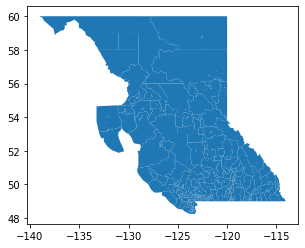

In [7]:
census2021.plot()

In [20]:
#Regions
tour = gpd.read_file('C:/Users/nitins/Desktop/Impact portal/Datasets/Census 2021/ADM_TOURISM_REGIONS_SP.geojson')
econ = gpd.read_file('C:/Users/nitins/Desktop/Impact portal/Datasets/Census 2021/CEN_ECONOMIC_REGIONS_SVW.geojson')

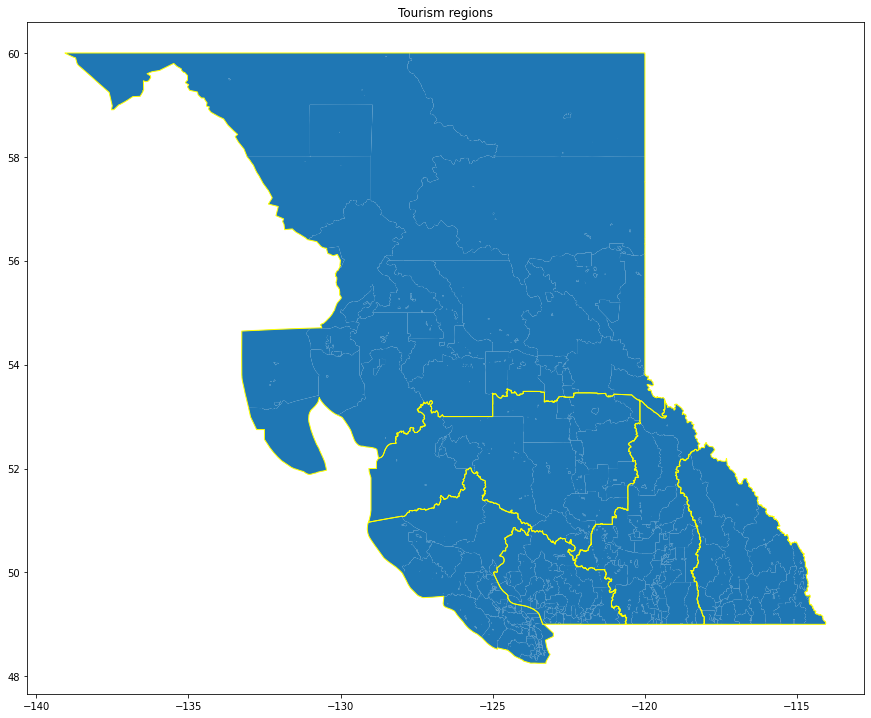

In [12]:
fig, ax = plt.subplots(figsize =(15,15))
census2021.plot(ax=ax)
tour.plot(ax=ax, color="None", edgecolor='yellow')
plt.title("Tourism regions")
plt.show()

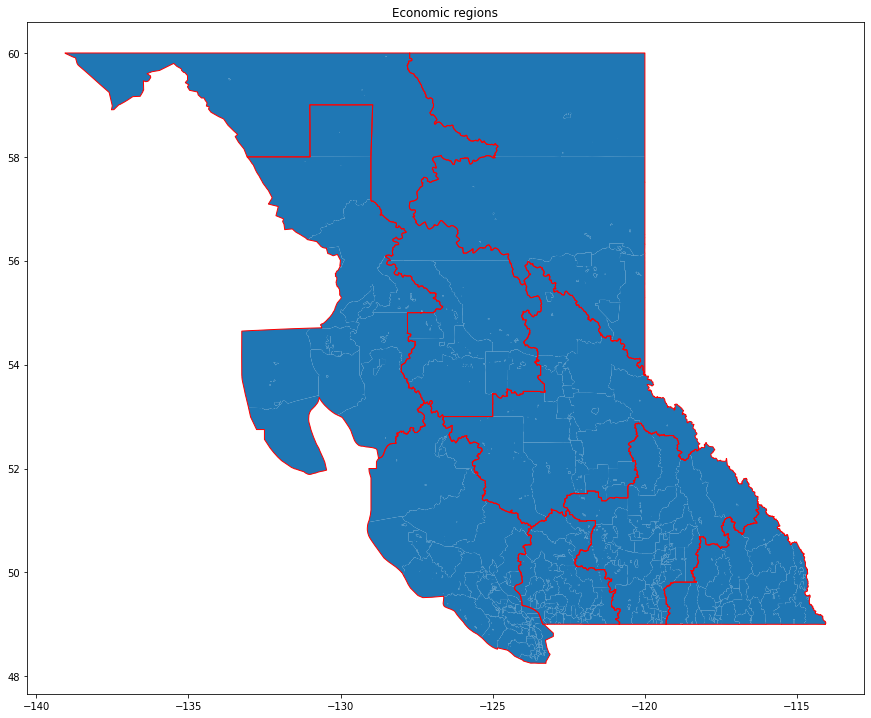

In [21]:
fig, ax = plt.subplots(figsize =(15,15))
census2021.plot(ax=ax)
econ.plot(ax=ax, color="None", edgecolor='red')
plt.title("Economic regions")
plt.show()

In [22]:
correspondence = {'Vancouver Island and Coast / Île de Vancouver et la côte':'vancouver_island_and_coast',
                 'Lower Mainland--Southwest / Lower Mainland--Sud-ouest':'lower_mainland_southwest',
                 'Thompson--Okanagan':'thompson_okanagan',
                 'Kootenay':'kootenay',
                 'Cariboo':'cariboo',
                 'North Coast / Côte-nord':'north_coast',
                 'Nechako':'nechako',
                 'Northeast / Nord-est':'northeast'}

In [35]:
econ['ECONOMIC_REGION_NAME_slug']= econ['ECONOMIC_REGION_NAME'].map(correspondence)

In [24]:
census_r1 = gpd.sjoin(census2021[['CENSUS_SUBDIVISION_NAME','POP_TOTAL_2021','POP_TOTAL_2016','geometry']], tour[['TOURISM_REGION_NAME','geometry']], how ='inner').drop(columns='index_right')
census_r2 = gpd.sjoin(census_r1, econ[['ECONOMIC_REGION_NAME','ECONOMIC_REGION_NAME_slug','geometry']], how ='inner').drop(columns='index_right')


In [28]:
census_r2.columns

Index(['CENSUS_SUBDIVISION_NAME', 'POP_TOTAL_2021', 'POP_TOTAL_2016',
       'geometry', 'TOURISM_REGION_NAME', 'ECONOMIC_REGION_NAME',
       'ECONOMIC_REGION_NAME_slug'],
      dtype='object')

In [29]:
tourism_reg= census_r2.groupby('TOURISM_REGION_NAME').sum().reset_index()


,TOURISM_REGION_NAME,POP_TOTAL_2021,POP_TOTAL_2016
0,Cariboo Chilcotin Coast,160111.0,155238.0
1,Kootenay Rockies,205317.0,191976.0
2,Northern British Columbia,326447.0,329341.0
3,Thompson Okanagan,702686.0,636289.0
4,Vancouver Island,936360.0,861601.0
5,"Vancouver, Coast and Mountains",3208792.0,2975537.0
